In [1]:
# for all execution
!mkdir -p local_logs

In [2]:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')


In [3]:
!sacctmgr show user $USER withassoc



      User   Def Acct     Admin    Cluster    Account  Partition     Share   Priority MaxJobs MaxNodes  MaxCPUs MaxSubmit     MaxWall  MaxCPUMins                  QOS   Def QOS 
---------- ---------- --------- ---------- ---------- ---------- --------- ---------- ------- -------- -------- --------- ----------- ----------- -------------------- --------- 
      eila   akundaje      None   sherlock   akundaje                  100                                                                               high_p,normal    normal 


In [4]:
# !echo $ACCESS_KEY
# !echo $SECRET_KEY

In [5]:
# check the jobs:

In [6]:
# !squeue -u eila


In [9]:
# !squeue -u eila

In [10]:
# !squeue -u eila

In [11]:
# !scancel -u eila

In [12]:
# !squeue -u eila --name=step1-do


In [13]:
# !chmod +x execute_sbatch_arrays_on_sherlock.py 

# eila_in_download_bams.txt: The input file name.
# step1-download-bams.sh: The SLURM script name.
# 1: entries_per_job (number of entries per job). - how much is each job needs
# 1: max_concurrent_tasks (maximum number of concurrent tasks). - 500 for stanford


# example for input of 1300 lines:
# ./execute_sbatch_arrays_on_sherlock.sh eila_in_download_bams.txt step1-download-bams.sh 500 500
# Breakdown:
# eila_in_download_bams.txt: The input file with 1200 lines.
# step1-download-bams.sh: The SLURM script to run.
# 500: Number of lines per job array (tasks per array).
# 500: Maximum number of concurrent tasks per array.

In [3]:
# !ls
# !pwd

In [4]:
# !ls /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step1/eila_encids_with_bam_urls-ENCSR164EBP.txt

In [28]:
# step 1
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')

# !echo $ACCESS_KEY
# !echo $SECRET_KEY

# !rm ./local_logs/slurm_step1_download_bams*
# !scancel -u eila
# !./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step1/eila_encids_with_bam_urls.txt step1-download-bams.sh 1000 1000
# !./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step1/eila_encids_with_bam_urls-debug.txt step1-download-bams.sh 2 2


!./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step1/eila_encids_with_bam_urls-ENCSR164EBP.txt step1-download-bams.sh 2 2




./execute_sbatch_arrays_on_sherlock.sh: line 22: /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step1/eila_encids_with_bam_urls-ENCSR164EBP.txt: No such file or directory
Total entries in input file: 
Total number of job arrays to be submitted: 0


In [86]:
# !ls $GROUP_SCRATCH/$USER/encode_pseudobulks/encode_pseudobulks_data/bams/ENCSR*/*_sorted.bam | head 

In [87]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/ENCSR*/*unsorted.bam > /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/bam_files_list.txt



In [2]:
# #step 2 - samtools sort and index
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/ENCSR*/*unsorted.bam > /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/bam_files_list.txt

# !./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step2/bam_files_list.txt step2-samtool-sort-index.sh 1000 1000



In [20]:
# !ls ./steps_inputs/

In [44]:
#step 3 - peaks - independant of BAMS:
from dotenv import load_dotenv
import os

# Load environment variables from the .env file
load_dotenv()

# Access the variables
ACCESS_KEY = os.getenv('ACCESS_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')

!rm ./local_logs/slurm_step3_peaks*
!ACCESS_KEY={ACCESS_KEY} SECRET_KEY={SECRET_KEY} ./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/eila_peaks_matched_to_experiments.txt step3-download-peaks.sh 1000 1000

# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step3/eila_peaks_matched_to_experiments.txt step3-download-peaks.sh 1000 1000

# debug
# !./execute_sbatch_arrays_on_sherlock.sh /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/steps_inputs/step3/eila_peaks_matched_to_experiments-debug.txt step3-download-peaks.sh 2 2


Total entries in input file: 1354
Total number of job arrays to be submitted: 2
Submitting job array from 1 to 1000 with a maximum of 1000 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-1000%1000
sbatch: cpus-per-task       : 2
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm_step3_peaks.err.combined.err
sbatch: mail-type           : INVALID_DEPEND,BEGIN,END,FAIL,REQUEUE,STAGE_OUT
sbatch: mail-user           : eila@stanford.edu
sbatch: mem                 : 2G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm_step3_peaks.out.combined.out
sbatch: partition           : akundaje,owners
sbatch: time                : 00:20:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
Submitted batch job 53981926
Submittin

In [1]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [101]:
ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ | wc -l

1354


In [59]:
# execute step 4-1 to create the input
# !chmod +x step4-1-input-for-peaks-by-blacklist.py
# !python step4-1-input-for-peaks-by-blacklist.py

In [1]:
# ! rm ./local_logs/slurm.al*
# !cat ./steps_inputs/step4/peaks_with_species-debug.txt
!head -5 ./steps_inputs/step4/peaks_with_species.txt

/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR449JMK/ENCFF672JNY/ENCSR449JMK_ENCFF672JNY.bed.gz human
/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR926GYX/ENCFF650UCO/ENCSR926GYX_ENCFF650UCO.bed.gz human
/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR863KXH/ENCFF200NJZ/ENCSR863KXH_ENCFF200NJZ.bed.gz human
/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR458RWW/ENCFF680GAC/ENCSR458RWW_ENCFF680GAC.bed.gz mouse
/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR552IFM/ENCFF207BWB/ENCSR552IFM_ENCFF207BWB.bed.gz mouse


In [80]:
# execute step 4-2
# !chmod +x step4-2-filter-peaks-by-blacklist.sh
!rm ./local_logs/slurm.step42*

!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step4/peaks_with_species.txt step4-2-filter-peaks-by-blacklist.sh 1000 1000

# debug
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step4/peaks_with_species-debug.txt step4-2-filter-peaks-by-blacklist.sh 2 2


Total entries in input file: 1354
Total number of job arrays to be submitted: 2
Submitting job array from 1 to 1000 with a maximum of 1000 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-1000%1000
sbatch: cpus-per-task       : 2
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step42.filterBackground.err.filter.log
sbatch: mail-type           : INVALID_DEPEND,BEGIN,END,FAIL,REQUEUE,STAGE_OUT
sbatch: mail-user           : eila@stanford.edu
sbatch: mem                 : 2G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step42.filterBackground.out.filter.log
sbatch: partition           : akundaje,owners
sbatch: time                : 00:20:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
Submitted batch jo

In [8]:
ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter/  | wc -l 

1354


In [104]:
# !squeue --user=$USER 

In [74]:
#preperation for step 5
import os
import pandas as pd
import glob

# Define the path based on your environment
group_scratch = os.getenv('GROUP_SCRATCH')
user = os.getenv('USER')
base_path = os.path.join(group_scratch, user, 'encode_pseudobulks', 'encode_pseudobulks_data', 'peaks_blacklist_filter')
print(f"base_path is {base_path}")

# Read the file with sample data
data_file = './steps_inputs/encids_matched_to_species.txt'  # Ensure this path is correct
df = pd.read_csv(data_file, sep='\t', header=None, names=['folder_name', 'species'])

# Create a list to hold output rows
output_rows = []

# Iterate through each folder name in the DataFrame
for _, row in df.iterrows():
    folder = row['folder_name']
    species = row['species']
    
    # Use glob to find all relevant .bed.gz files in the specified path
    search_pattern = os.path.join(base_path, folder, '*', '*_peaks_no_blacklist.bed.gz')
    files = glob.glob(search_pattern)
    
    # Add an entry for each found file
    for file in files:
        output_rows.append([folder, species, file])

# Convert the output list to a DataFrame
output_df = pd.DataFrame(output_rows, columns=['folder_name', 'species', 'file_path'])

# Ensure output directory exists
output_dir = './steps_inputs/step5/'
os.makedirs(output_dir, exist_ok=True)

# Define the output file path
output_file = os.path.join(output_dir, 'peaks_filtered_by_blacklist_merged_with_species_output.txt')

# Save the output DataFrame to a space-delimited file, overwriting if it exists
output_df.to_csv(output_file, sep=' ', header=False, index=False)

print(f'Output saved to {output_file}')


base_path is /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks_blacklist_filter
Output saved to ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_species_output.txt


In [106]:
!wc -l ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_species_output.txt


1354 ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_species_output.txt


In [ ]:
# #step 5 - non-peaks / background / negative - human:

# Generate negative for all folds
!rm ./local_logs/slurm.step5NegativesNoPeaksBackground*
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step5/peaks_filtered_by_blacklist_merged_with_species_output.txt step5-compute-peak-without-blacklist.sh 1000 1000

#  debug
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step5/debug_peaks_filtered_by_blacklist_merged_with_species_output.txt step5-compute-peak-without-blacklist.sh 1 1



Total entries in input file: 1354
Total number of job arrays to be submitted: 2
Submitting job array from 1 to 1000 with a maximum of 1000 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-1000%1000
sbatch: cpus-per-task       : 8
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step5NegativesNoPeaksBackground_%A_%a.err
sbatch: job-name            : step5NegativesNoPeaksBackground
sbatch: mem                 : 64G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step5NegativesNoPeaksBackground_%A_%a.out
sbatch: partition           : akundaje,owners
sbatch: time                : 10:00:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
Submitting job array from 1001 to 1354 with a maximum of 1000 concurrent ta

In [1]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*nonpeaks_negatives.bed | wc -l
#1354


1354


In [2]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_1/*nonpeaks_negatives.bed | wc -l
#1354


1354


In [3]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_2/*nonpeaks_negatives.bed | wc -l
#1354


1354


In [4]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_3/*nonpeaks_negatives.bed | wc -l
#1354


1354


In [5]:
!ls -lt $GROUP_SCRATCH/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_4/*nonpeaks_negatives.bed | wc -l
#1354


1354


In [3]:
# prep for step 6
# !chmod +x ./step6-1-create_input.sh
# !./step6-1-create_input.sh 
# quiet mode
# Generate input for fold_0 and all folds. we will start from fold_0 to see what was done correctly. while developing the QC, we will run all the others
# The code knows not to repeat models that already available 
# check the ./local_logs/step6.1.txt for the erros that migght explain missing fold_0 rows

# !./step6-1-create_input.sh 
# ! wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_0.txt

!chmod +x ./step6-1-create_input_for_all_folds.sh
!./step6-1-create_input_for_all_folds.sh
# !wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_1.txt
# 

In [7]:
!wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_0.txt

1354 ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_0.txt


In [4]:
!wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_1.txt

1354 ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_1.txt


In [8]:
!wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_2.txt

1354 ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_2.txt


In [6]:
!wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_3.txt

1354 ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_3.txt


In [5]:
!ls ./steps_inputs/step6/

chrombpnet_pipeline_extracted_paths_fold_0.txt
chrombpnet_pipeline_extracted_paths_fold_1.txt
chrombpnet_pipeline_extracted_paths_fold_2.txt
chrombpnet_pipeline_extracted_paths_fold_3.txt
chrombpnet_pipeline_extracted_paths_fold_4.txt
chrombpnet_pipeline_extracted_paths.txt


In [ ]:
!wc -l ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths.txt


In [ ]:
# all folds:

!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths.txt step6-2-chrombpnet-pipelline.sh 1000 1000 


Total entries in input file: 6770
Total number of job arrays to be submitted: 7
Submitting job array from 1 to 1000 with a maximum of 1000 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-1000%1000
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step62.bpnetPipeline.combined.err
sbatch: gpus                : 1
sbatch: job-name            : step62.bpnetPipeline
sbatch: mem                 : 64G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/slurm.step62.bpnetPipeline.combined.out
sbatch: partition           : akundaje,owners
sbatch: time                : 2-00:00:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
Submitting job array from 1001 to 2000 with a maximum of 1000 concurrent tasks.
sbatch: defined opti

In [1]:
# !chmod +x step6-2-train.sh
# !rm ./local_logs/slurm.step62.bpnetPipeline*
# fold_0
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_0.txt step6-2-chrombpnet-pipelline.sh 1000 1000 


In [ ]:
# chrombpnet_pipeline_extracted_paths_fold_1
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_1.txt step6-2-chrombpnet-pipelline.sh 1000 1000 



In [18]:
# chrombpnet_pipeline_extracted_paths_fold_2
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_2.txt step6-2-chrombpnet-pipelline.sh 1000 1000 


In [ ]:
# chrombpnet_pipeline_extracted_paths_fold_3
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_3.txt step6-2-chrombpnet-pipelline.sh 1000 1000 



In [ ]:
# chrombpnet_pipeline_extracted_paths_fold_4
# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6/chrombpnet_pipeline_extracted_paths_fold_4.txt step6-2-chrombpnet-pipelline.sh 1000 1000 


6.3.1-check the results - nseqspec

In [2]:
# !ls

In [5]:
# NA:
# !jupyter nbconvert --to script step6-3-1-remove-motifs-with-low-numseqs.ipynb --output step6_3_1_remove_motifs_with_low_numseqs
# !ls step6_3*


step6_3_1_remove_motifs_with_low_numseqs.py


In [1]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/evaluation/modisco_profile/trimmed_logos
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_1_motifs_qc





invalid_images		 invalid_pos_patterns.h5  valid_neg_patterns.h5
invalid_neg_patterns.h5  valid_images		  valid_pos_patterns.h5


In [2]:

!ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_1_motifs_qc/invalid_images


neg_patterns.pattern_0.cwm.fwd.png   pos_patterns.pattern_15.cwm.fwd.png
neg_patterns.pattern_0.cwm.rev.png   pos_patterns.pattern_15.cwm.rev.png
neg_patterns.pattern_1.cwm.fwd.png   pos_patterns.pattern_16.cwm.fwd.png
neg_patterns.pattern_1.cwm.rev.png   pos_patterns.pattern_16.cwm.rev.png
pos_patterns.pattern_13.cwm.fwd.png  pos_patterns.pattern_17.cwm.fwd.png
pos_patterns.pattern_13.cwm.rev.png  pos_patterns.pattern_17.cwm.rev.png
pos_patterns.pattern_14.cwm.fwd.png  pos_patterns.pattern_18.cwm.fwd.png
pos_patterns.pattern_14.cwm.rev.png  pos_patterns.pattern_18.cwm.rev.png


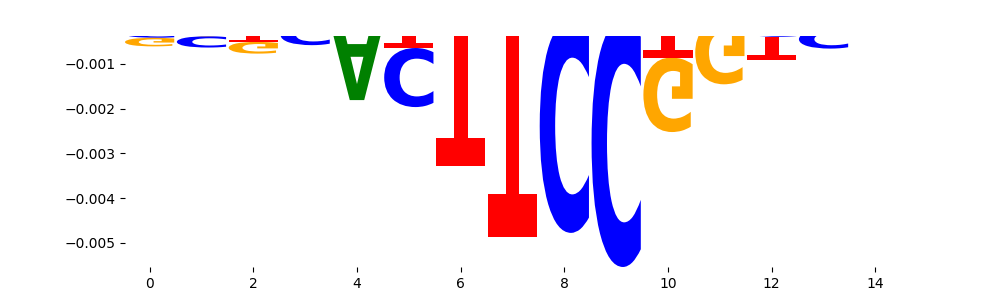

In [3]:
from IPython.display import Image, display

# Display a PNG image
image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_1_motifs_qc/invalid_images/neg_patterns.pattern_0.cwm.fwd.png"

display(Image(filename=image_path))

In [5]:
# !chmod +x step6-3-1-qc-nseqlet.sh
# !chmod +x step6_3_1_remove_motifs_with_low_numseqs.py
# /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/evaluation/modisco_profile/trimmed_logos
# !./step6-3-1-qc-nseqlet.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5



6.3.2 -check the results - qval

In [6]:
# !chmod +x step6-3-2-qc-qval.sh
# !chmod +x step6_3_2_filter_motifs_by_qval.py
# !./step6-3-2-qc-qval.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5



In [7]:
!ls step6*

step6-1-create_input_for_all_folds.sh
step6-2-chrombpnet-pipelline.sh
step6-3-1-qc-nseqlet.sh
step6_3_1_remove_motifs_with_low_numseqs.py
step6_3_2_filter_motifs_by_qval.py
step6-3-2-qc-qval.sh
step6_3_3_filter_motifs_with_tn5_bias.py
step6-3-3-qc-bias-tn5.sh
step6-3-review-pipeline-report.sh


6.3.3 -check the for tn5 bias

In [34]:
#prepare debug data for step 6-3-3:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 > ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt
!wc ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt

   617    617 128953 ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt


In [ ]:
# !chmod +x step6-3-3-qc-bias-tn5.sh
# !chmod +x step6_3_3_filter_motifs_with_tn5_bias.py
# !./step6-3-3-qc-bias-tn5.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5
!./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step6_3/debug_modisco_results_profile_scores_h5.txt step6-3-3-qc-bias-tn5.sh 617 617 


Total entries in input file: 617
Total number of job arrays to be submitted: 1
Submitting job array from 1 to 617 with a maximum of 617 concurrent tasks.
sbatch: defined options
sbatch: -------------------- --------------------
sbatch: array               : 1-617%617
sbatch: cpus-per-task       : 4
sbatch: error               : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/633_motifs_qc_bias_tn5.err
sbatch: job-name            : 633_motifs_qc_bias_tn5
sbatch: mem                 : 8G
sbatch: ntasks              : 1
sbatch: output              : /oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas/local_logs/633_motifs_qc_bias_tn5.out
sbatch: partition           : akundaje,owners
sbatch: time                : 10:00:00
sbatch: verbose             : 1
sbatch: -------------------- --------------------
sbatch: end of defined options
Waiting for jobs 56010738 to complete... Sleeping for 20 minutes.
Waiting for jobs 56010738 to complete... Sleeping for 20 minutes.


In [ ]:
# check which motifs are tn5 biased - debug set

# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/*/*/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/*invalid_logos/


In [ ]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_invalid_logos



In [ ]:
# !ls /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_valid_logos



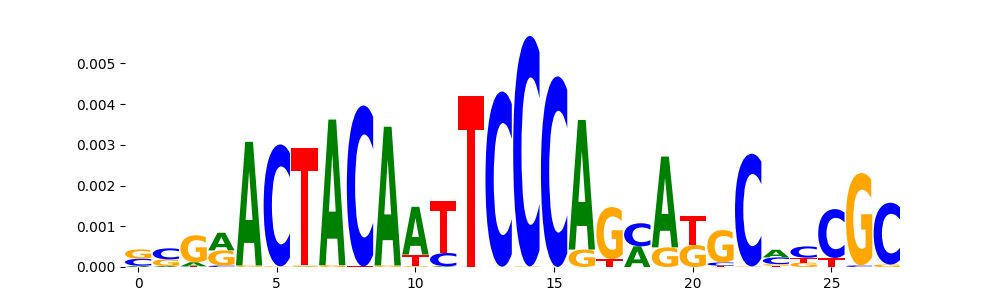

In [23]:
from IPython.display import Image, display

# Display a PNG image
image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_valid_logos/pos_patterns.pattern_7.cwm.fwd.png"

display(Image(filename=image_path))



In [18]:
# from IPython.display import Image, display

# # Display a PNG image
# image_path = "/scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR004DZS/ENCFF709MRG/fold_0/step62.bpnetPipeline/qc/out_step_6_3_3_motifs_qc_bias_tn5/pos_patterns_valid_logos/pos_patterns.pattern_0.cwm.fwd.png"
# display(Image(filename=image_path))



<!-- 6.3.2 -check the results - qval -->

In [6]:
# !ls step6*

step6-1-create_input_for_all_folds.sh
step6-2-chrombpnet-pipelline.sh
step6-3-1-qc-nseqlet.sh
step6_3_1_remove_motifs_with_low_numseqs.py
step6_3_2_filter_motifs_by_qval.py
step6-3-2-qc-qval.sh
step6_3_3_filter_motifs_with_tn5_bias.py
step6-3-3-qc-bias-tn5.sh
step6-3-review-pipeline-report.sh


In [7]:
# !ls step6-3-2*

step6-3-2-qc-qval.sh


In [5]:
# !chmod +x step6-3-2-qc-qval.sh
# !chmod +x step6_3_2_filter_motifs_by_qval.py
# !./step6-3-2-qc-qval.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5



In [7]:
# execute step 6-3-2-high-match-motifs-no-tn5.sh
# !./step 6-3-2-high-match-motifs.sh /scratch/groups/akundaje/eila/encode_pseudobulks/old_encode_pseudobulks_model_training/human/ENCSR877WNS/ENCFF270AAM/fold_0/step62.bpnetPipeline/auxiliary/interpret_subsample/modisco_results_profile_scores.h5 out_step_6_3_1


### Jobs running

In [2]:
!squeue --user=$USER | wc -l
# 48


48


In [2]:
# !squeue --user=$USER
# 54958965

In [11]:
# !scancel 54084823

In [51]:
# !squeue -u $USER -o "%i %j" | grep step5Neg


In [24]:
# !squeue -u $USER -o "%i" | grep step5Neg | xargs scancel
!ls -lt /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/mouse/ENCSR945OSX/ENCFF142CJI/fold_3

total 15940
-rw-r--r-- 1 eila akundaje 16317648 Oct  7 17:10 ENCSR945OSX_ENCFF142CJI_mouse_nonpeaks_negatives.bed
drwxr-sr-x 2 eila akundaje     4096 Oct  7 17:10 ENCSR945OSX_ENCFF142CJI_mouse_nonpeaks_auxiliary


In [26]:
!ls -lt /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/mouse/ENCSR619QCA/ENCFF499UFR/fold_4/

total 5924
-rw-r--r-- 1 eila akundaje 6061850 Oct  7 16:53 ENCSR619QCA_ENCFF499UFR_mouse_nonpeaks_negatives.bed
drwxr-sr-x 2 eila akundaje    4096 Oct  7 16:53 ENCSR619QCA_ENCFF499UFR_mouse_nonpeaks_auxiliary


In [5]:
# Next: 
# array_job_interpret_example.sh - with 1000 peaks. counts and profile - two heads (one after the other)
# seperate the profile from the counts - so we will not have timeput
# note: can also run profile and counts steps separately (will have more jobs, each will take less time)
# This need to be updated. https://github.com/kundajelab/chrombpnet/wiki/Generate-contribution-score-bigwigs
# -pc for counts. -pc for profile. can be as paraemterts with the value of the -pc and one script.
# chrombpnet contribs_bw \
#  -m ${MODEL_PATH} \
#  -r ${REGIONS_PATH} \
#  -g /oak/stanford/groups/akundaje/ziwei75/atac_seq_pipeline/hg38/GRCh38_no_alt_analysis_set_GCA_000001405.15.fasta \ # update this for mouse
#  -c /oak/stanford/groups/akundaje/ziwei75/atac_seq_pipeline/hg38/GRCh38_EBV.chrom.sizes.tsv \ # update this for mouse
#  -op ${output_dir}/${ENCSR_ID} | tee -a $log
# comment the counts
# change to $SCRATCH_GOUP
# copy to $SCRATCH_GOUP whatever is remaining.
#  

In [6]:
# !sstat -j 52658719 --format=JobID,MaxRSS,MaxVMSize


In [7]:
# !scontrol show job 52659563


In [33]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
54150538_[45-1000% owners,ak step5Neg     eila PD       0:00      1 (Resources)
54150540_[1001-135 owners,ak step5Neg     eila PD       0:00      1 (Resources)


In [121]:
# !scancel -u eila

In [122]:
# !scancel 53562999_1

In [39]:
# !sacct -j 53978234 --format=JobID,State,ExitCode


In [84]:
# #step 5 - train chrombpnet - human

# !./execute_sbatch_arrays_on_sherlock.sh ./steps_inputs/step5/human/eila_peaks_matched_to_experiments-debug.txt step4-compute-negatives-non-peak-background.sh 2 2




In [21]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model

In [22]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model/ENCSR396HHA


In [22]:
# !ls /scratch/users/eila/encode_pseudobulks/chrombpnet_model/ENCSR396HHA/negatives/fold_0
# !squeue --user=$USER

In [11]:
# !scontrol show job 52237837
!squeue --user=$USER --state=PENDING | wc -l

3


In [20]:
!squeue --user=$USER --state=RUNNING

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [14]:
!squeue --user=$USER --state=PENDING

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
54150540_[1001-135 owners,ak step5Neg     eila PD       0:00      1 (None)
54150538_[1-1000%1 owners,ak step5Neg     eila PD       0:00      1 (None)


In [15]:
!squeue --user=$USER --state=COMPLETED | wc -l

1


In [19]:
!squeue --user=$USER --state=RUNNING | wc -l

1


In [18]:
!echo $USER

eila


In [22]:
# !scontrol show job 52275013


In [23]:
# !squeue -u eila


In [24]:
# !squeue --user=$USER --state=PENDING


In [25]:
# !squeue --user=$USER --state=RUNNING


In [26]:
# !scontrol show job | grep $USER
!squeue -u eila --state=FAILED,PREEMPTED,TIMEOUT,PREEMPTED,NODE_FAIL,CANCELLED

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [27]:
# !squeue -u eila -o "%.18i %.9P %.12j %.8u %.2t %.10M %.10l %.10Q %.19V %.19S"


In [28]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [29]:
# !squeue -u eila

In [30]:
# Remove logs
# !find ./local_logs/ -name '*slurm*' -type f -mmin +600 -exec rm {} \;


In [31]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/ENCSR925AYP/ENCSR925AYP_sorted.bam 

In [32]:
# !ls /scratch/users/eila/encode_pseudobulks_data/ENCSR000NVR/peaks/ENCFF585MYS/ENCSR000NVR_ENCFF585MYS.bed.gz


In [33]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/*/*_sorted.bam | wc -l

In [34]:
# !ls /scratch/users/eila/encode_pseudobulks_data/peaks/*/*/*.bed.gz | wc -l


In [35]:
# !ls /scratch/users/eila/encode_pseudobulks_data/bam/*/*_unsorted.bam | wc -l

In [36]:
# !rm ./local_logs/slurm_step1_download_bams_err.combined.err

In [37]:
# !rm ./local_logs/slurm_step4*

In [38]:
# !ls

In [39]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [40]:
# !ls -l ./local_logs/slurm_step5*

In [41]:
# bias - given for the train
# train - on one file. provides correlation metrics. we need to look at the motifs that modisco populates
#         model. modisco on subset of the peaks- subset is random. evaludation folder - modisco and interpret on 30K areas
# QC
# interpret on subset of the peaks.


In [42]:
!echo $HOME

/home/users/eila


In [43]:
# %%bash

# # Define the base directories
# SRC_BASE="/scratch/users/eila/encode_pseudobulks_data"
# DEST_BASE="/scratch/users/eila/encode_pseudobulks_data/bam"

# # Loop through all directories matching ENCSR* and move files
# for DIR in ${SRC_BASE}/ENCSR*/bam; do
#     # Extract the directory name after /ENCSR
#     DIR_NAME=$(basename $(dirname "$DIR"))
    
#     # Define source and destination directories
#     SRC_DIR="${SRC_BASE}/${DIR_NAME}/bam"
#     DEST_DIR="${DEST_BASE}/${DIR_NAME}"
    
#     # Create destination directory if it doesn't exist
#     mkdir -p "$DEST_DIR"
    
#     # Move files from source to destination
#     mv "$SRC_DIR"/* "$DEST_DIR"/
    
#     echo "Moved files from $SRC_DIR to $DEST_DIR"
# done


In [44]:
 # scp -r eila@login.sherlock.stanford.edu:scratch/users/eila/encode_pseudobulks_model_training/human/ENCSR037JDN/ENCFF933KCP/fold_1_30000_20240912_182023/evaluation . 


# !rm ./local_logs/slurm_samools_err.combined.err
# !rm ./local_logs/slurm_samools_out.combined.out

In [45]:
# !chmod +x samtools_merge.sh
# !sbatch --verbose samtools_merge.sh
# !ls

In [8]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [13]:
# !chmod +x samtools_sort.sh
# !sbatch --verbose samtools_sort.sh
# !ls

In [21]:
# !squeue --user=$USER

In [44]:
# while true; do ls -lt; sleep 10; done

In [45]:
# !chmod +x 03_samtools_index.sh
# !sbatch --verbose 03_samtools_index.sh


In [46]:
# !ls
# !chmod +x 04_chrombpnet_pipeline.sh
# !chmod +x 04_chrombpnet_pipeline-inputs.sh
# !chmod +x Step5-2_Debug_chrombpnet_pipeline.sh
# !sbatch --verbose 04_chrombpnet_pipeline.sh

In [144]:
# %%bash
# GPUS=1

# AVAILABLE_GPUS=$(sinfo -p akundaje,owners --format="%G" | grep -o '[0-9]*' | head -n 1)
# echo $AVAILABLE_GPUS
# # Check if GPUs are available on Sherlock
# if [ "$AVAILABLE_GPUS" -ge "$GPUS" ]; then
#     echo "Submitting with GPU resources"
#     # sbatch --gres=gpu:${GPUS} 04_chrombpnet_pipeline.sh
#     # sbatch --gres=gpu:${GPUS} 04_chrombpnet_pipeline-inputs.sh
#     # sbatch --gres=gpu:${GPUS} Step5-2_Debug_chrombpnet_pipeline.sh
#     # sbath --gres=gpu:${GPUS} step6-2-chrombpnet-pipelline.sh 
# else
#     echo "No GPU available, submitting with 64 CPUs"
#     # sbatch --cpus-per-task=64 04_chrombpnet_pipeline.sh
#     # sbatch --cpus-per-task=64 04_chrombpnet_pipeline-inputs.sh
#     # sbatch --cpus-per-task=64 Step5-2_Debug_chrombpnet_pipeline.sh
#     # sbath --cpus-per-task=64 step6-2-chrombpnet-pipelline.sh 
# fi

In [48]:
 # CPU exeuction

# !sbatch --cpus-per-task=64 04_chrombpnet_pipeline.sh
# !sbatch 01_utils_rsync.sh


In [49]:
# !sinfo -p akundaje,owners --format="%G"

In [50]:
!sinfo -p akundaje,owners --format="%G" | grep -o '[0-9]*' | head -n 1

3


In [51]:
# !scontrol update jobid=53289110 nice=0


In [52]:
!squeue -u $USER -o "%.18i %.9u %.2t %.10l %.6p %.20j %.6r"


             JOBID      USER ST TIME_LIMIT PRIORI                 NAME REASON
        53497421_1      eila  R 2-00:00:00 0.0002 step6-2-train-chromb   None
    53502124_[1%1]      eila PD      20:00 0.0000 step4-2-filter-peaks Priori


In [53]:
!squeue -o "%.18i %.9u %.2t %.10l %.6p %.20j %.6r" -u $USER


             JOBID      USER ST TIME_LIMIT PRIORI                 NAME REASON
        53497421_1      eila  R 2-00:00:00 0.0002 step6-2-train-chromb   None
    53502124_[1%1]      eila PD      20:00 0.0000 step4-2-filter-peaks Priori


In [54]:
!squeue --user=$USER 

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
        53497421_1  akundaje step6-2-     eila  R    1:53:18      1 sh02-12n11
    53502124_[1%1] owners,ak step4-2-     eila PD       0:00      1 (Priority)


In [55]:
!squeue --user=$USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
        53497421_1  akundaje step6-2-     eila  R    1:53:18      1 sh02-12n11
    53502124_[1%1] owners,ak step4-2-     eila PD       0:00      1 (Priority)


In [56]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.9m %.10C %.10R %.10N %.10L"

     JOBID       NAME    STATE MIN_MEMOR       CPUS NODELIST(REASON)   NODELIST  TIME_LEFT
53497421_1 step6-2-tr  RUNNING       64G          1 sh02-12n11 sh02-12n11 1-22:06:26
53502124_[ step4-2-fi  PENDING        2G          2 (Priority)                 20:00


In [57]:
!squeue --user=$USER --format="%.18i %.50j %.8T %.10M %.5P %.16R"


             JOBID                                               NAME    STATE       TIME PARTI NODELIST(REASON)
        53497421_1                           step6-2-train-chrombpnet  RUNNING    1:53:34 akund       sh02-12n11
    53502124_[1%1]               step4-2-filter-peaks-by-blacklist.sh  PENDING       0:00 owner       (Priority)


In [58]:
# !scancel 53305606

In [2]:
!squeue --user=$USER --long



Fri Sep 27 13:00:37 2024
             JOBID PARTITION     NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)
        53508298_1  akundaje 52allval     eila  RUNNING 1-18:32:35 2-00:00:00      1 sh02-02n32
        53529465_1  akundaje  62epoch     eila  RUNNING 1-03:46:20 2-00:00:00      1 sh03-16n24


In [6]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.9m %.10C"




     JOBID       NAME    STATE MIN_MEMOR       CPUS
53973427_[ step62.bpn  PENDING       64G          1


In [1]:
!squeue --user=$USER --format="%.10i %.10j %.8T %.8D %.16R"




     JOBID       NAME    STATE    NODES NODELIST(REASON)


In [57]:
# !ls ./chrombpnet_tutorial/data/splits

In [58]:
# !ls ./chrombpnet_tutorial/data/downloads

In [59]:
# !ls ./chrombpnet_tutorial/bias_model

In [60]:
# !ls ./chrombpnet_tutorial/data

In [143]:
!rm ./local_logs/slurm.52allval.combined*

In [283]:
# !rm ./local_logs/slurm_tr_epoch.combined*

In [25]:
# !rm ./local_logs/slurm.gpu_ENCSR037JDN.*

In [2]:
!pwd

/oak/stanford/groups/akundaje/eila/git_tf_chromatin_atlas


In [49]:

# %%bash

# path="/scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_data/peaks/ENCSR449JMK/ENCFF672JNY/ENCSR449JMK_ENCFF672JNY.bed.gz"

# ID1=$(echo "$path" | awk -F'/' '{print $(NF-2)}')  # Extracts the second last directory name
# ID2=$(echo "$path" | awk -F'/' '{print $(NF-1)}')  # Extracts the last directory name

# echo "ID1: $ID1"
# echo "ID2: $ID2"


ID1: ENCSR449JMK
ID2: ENCFF672JNY


In [4]:
# pip show biopython


In [68]:
!ls copy*

copy_logs_from_local_machine.txt  copy_sorted_bams.sh


In [73]:
# !chmod +x copy_sorted_bams.sh

In [72]:
# !./copy_sorted_bams.sh

In [53]:
!ls /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*_nonpeaks.bed




ls: cannot access /scratch/groups/akundaje/eila/encode_pseudobulks/encode_pseudobulks_negative/*/*/*/fold_0/*_nonpeaks.bed: No such file or directory


In [49]:


# !rm ./local_logs/slurm.step5NegativesNoPeaksBackground.combined.err
# "Debug: Nonpeaks negatives file

In [25]:
# !rm ./output_example/evaluation/modisco_profile/trimmed_logos/out*